# DEEP LEARNING PROJECT
## Data visualization & exploration
#### Bui Xuan Julia Lan, Grosso Silvia, Rocchi Niccolò

#### Modules importation

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib
from matplotlib import pyplot as plt
from shutil import copyfile
import pandas as pd
import numpy as np
import scipy.io
import cv2 as cv
from skimage import exposure

#### Data upload

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# copyfile('gdrive/My Drive/DEEP-project/Progetto_DL_finale/rit18_data.mat', 'data.mat')
# copyfile('gdrive/My Drive/DEEP-project/val_predicted_mask2.npy', 'val_predicted_mask2.npy')

Mounted at /content/gdrive


'data.mat'

In [ ]:
data = scipy.io.loadmat('data.mat')

#### Data exploration

In [ ]:
print('train:',data['train_data'].shape, 'val:',data['val_data'].shape, 'test:',data['test_data'].shape)

train: (7, 9393, 5642) val: (7, 8833, 6918) test: (7, 12446, 7654)


In [ ]:
set = 'val'

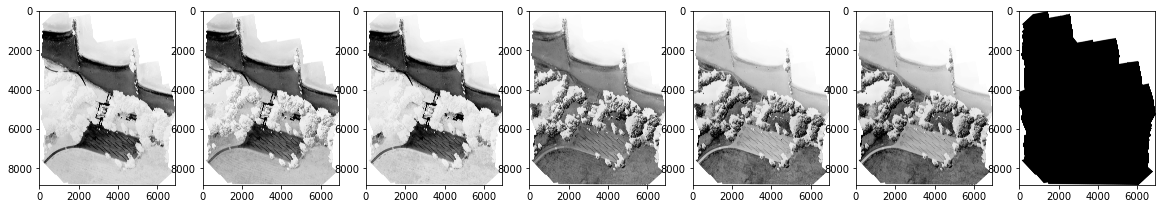

In [ ]:
fig, axs = plt.subplots(1,7,figsize=(20,150))
for i in range(7):
  img = data[f'{set}_data'][i]
  img = cv.convertScaleAbs(img, alpha=(255/img.max()))
  #img = exposure.equalize_adapthist(img, clip_limit=0.03)
  p2, p98 = np.percentile(img, (2, 98))
  img = exposure.rescale_intensity(img, in_range=(p2, p98)) 
  axs[i].imshow(img,cmap='Greys')

In [ ]:
img = np.transpose(np.array(data[f'{set}_data'][0:3,:,:]), [1,2,0])
img = img/img.max()

In [ ]:
tf.keras.utils.array_to_img(img)

In [ ]:
fig, axs = plt.subplots(1,2,figsize = (100,30))
equ = []
for i in list(range(0,3)):
  img = data[f'{set}_data'][i,:,:] 
  #img = cv.convertScaleAbs(img, alpha=(255/img.max()))
  img = exposure.equalize_adapthist(img, clip_limit=0.01)
  p2, p98 = np.percentile(img, (2, 98))
  img = exposure.rescale_intensity(img, in_range=(p2, p98)) 
  equ.append(img)
equ = np.array(equ)
equ = equ.transpose(1,2,0)
axs[0].imshow(equ,vmin=0, vmax=254**2)
axs[1].imshow(data[f'{set}_labels'],vmin=0,vmax=18,cmap='jet')


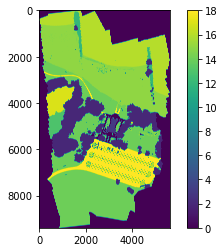

In [ ]:
plt.imshow(data['train_labels'])
plt.colorbar()

Absolute and percentage frequencies per class in training image:

In [ ]:
sum = 0
for i in list(range(0,19)):
  freq = len(data['train_labels'][data['train_labels']==i])
  sum += freq
  print(data['classes'][i],' : ', '  f ass_tr:', freq, '  f perc_tr:', round(freq/52995306*100,3))
print('total_tr :',sum, data['train_data'].shape[1]*data['train_data'].shape[2])

0. Other Class/Image Border        :    f ass_tr: 13782516   f perc_tr: 26.007
1. Road Markings                   :    f ass_tr: 154048   f perc_tr: 0.291
2. Tree                            :    f ass_tr: 6065240   f perc_tr: 11.445
3. Building                        :    f ass_tr: 177727   f perc_tr: 0.335
4. Vehicle (Car, Truck, or Bus)    :    f ass_tr: 43915   f perc_tr: 0.083
5. Person                          :    f ass_tr: 1635   f perc_tr: 0.003
6. Lifeguard Chair                 :    f ass_tr: 2763   f perc_tr: 0.005
7. Picnic Table                    :    f ass_tr: 10677   f perc_tr: 0.02
8. Black Wood Panel                :    f ass_tr: 974   f perc_tr: 0.002
9. White Wood Panel                :    f ass_tr: 1170   f perc_tr: 0.002
10. Orange Landing Pad             :    f ass_tr: 841   f perc_tr: 0.002
11. Water Buoy                     :    f ass_tr: 893   f perc_tr: 0.002
12. Rocks                          :    f ass_tr: 496681   f perc_tr: 0.937
13. Other Vegetation     

Absolute and percentage frequencies per class in validation image:

In [ ]:
sum = 0
for i in list(range(0,19)):
  freq = len(data['val_labels'][data['val_labels']==i])
  sum += freq
  print(data['classes'][i],' : ', '  f ass_val:', freq, '  f perc_val:', round(freq/61106694*100,3))
print('total_val :',sum, data['val_data'].shape[1]*data['val_data'].shape[2])

0. Other Class/Image Border        :    f ass_val: 14236104   f perc_val: 23.297
1. Road Markings                   :    f ass_val: 185663   f perc_val: 0.304
2. Tree                            :    f ass_val: 7758120   f perc_val: 12.696
3. Building                        :    f ass_val: 264894   f perc_val: 0.433
4. Vehicle (Car, Truck, or Bus)    :    f ass_val: 31643   f perc_val: 0.052
5. Person                          :    f ass_val: 481   f perc_val: 0.001
6. Lifeguard Chair                 :    f ass_val: 2767   f perc_val: 0.005
7. Picnic Table                    :    f ass_val: 15316   f perc_val: 0.025
8. Black Wood Panel                :    f ass_val: 0   f perc_val: 0.0
9. White Wood Panel                :    f ass_val: 0   f perc_val: 0.0
10. Orange Landing Pad             :    f ass_val: 801   f perc_val: 0.001
11. Water Buoy                     :    f ass_val: 2050   f perc_val: 0.003
12. Rocks                          :    f ass_val: 493041   f perc_val: 0.807
13. Oth

Comparison of percentage frequency per class between trainining and validation images:

In [ ]:
freq = pd.DataFrame()
freq['number'] = list(range(0,19))
freq['classes'] = [data['classes'][i] for i in list(range(0,19))]
freq['perc_tr'] = [round(len(data['train_labels'][data['train_labels']==i])/52995306*100,3) for i in list(range(0,19))]
freq['perc_val'] = [round(len(data['val_labels'][data['val_labels']==i])/61106694*100,3) for i in list(range(0,19))]
freq = freq.sort_values('perc_tr', ascending = False)
freq

,number,classes,perc_tr,perc_val
0,0,0. Other Class/Image Border,26.007,23.297
14,14,14. Grass,22.545,24.804
15,15,15. Sand,14.975,14.759
16,16,16. Water (Lake),12.175,11.389
2,2,2. Tree,11.445,12.696
18,18,18. Asphalt (Parking Lot/Walkway),8.270,7.015
17,17,17. Water (Pond),1.804,1.980
13,13,13. Other Vegetation,1.098,2.428
12,12,12. Rocks,0.937,0.807
3,3,3. Building,0.335,0.433


In [ ]:
series = freq.set_index('number')['perc_tr']

Histogram of percentage frequencies per class in training and validation set 

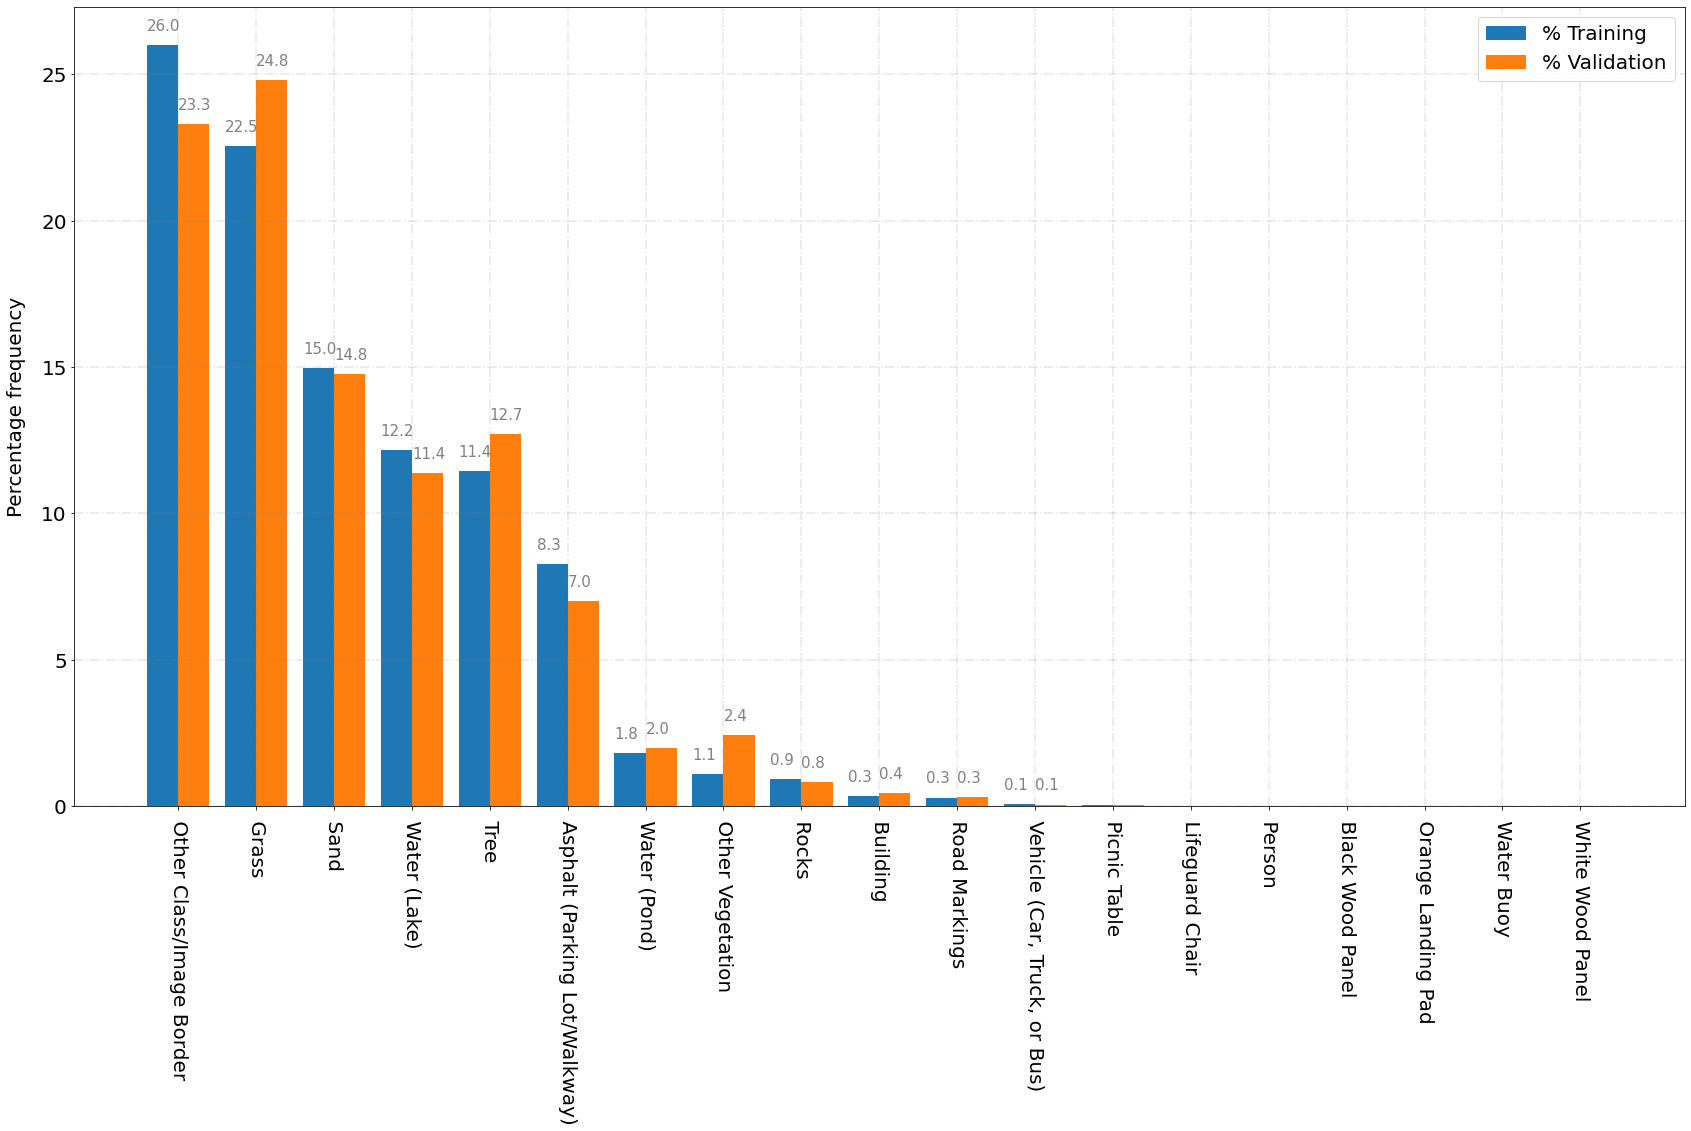

In [ ]:
 cls = list(freq['classes'])
 classes = []
 for elem in cls:
   classes.append(np.char.strip(elem,'0123456789.'))

labels = list(freq['number']) 
tr_perc = list(freq['perc_tr'])
val_perc = list(freq['perc_val'])

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tr_perc, width, label='% Training')
rects2 = ax.bar(x + width/2, val_perc, width, label='% Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage frequency',fontsize=20, labelpad = 15)
#ax.set_title('Comparison between training and validation percentage frequencies',fontsize=13)
#ax.set_xticks(x,classes)
ax.legend(fontsize=20)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1.5, alpha=0.2)

# Add annotation to bars
for i in ax.patches:
  if str(round(i.get_height(),1)) != '0.0':
         ax.text(i.get_x(),i.get_height()+0.5, str(round(i.get_height(),1)),
            fontsize=15, color='grey')

fig.tight_layout()
fig.set_size_inches(30, 15)

plt.xticks(x,classes,  rotation = -90)
plt.rcParams.update({'font.size': 20})
plt.show()
fig.savefig('high_perc.png', bbox_inches='tight')

## Analysis of final validation image predicted

In [ ]:
val_pred = np.load('val_predicted_mask2.npy')

In [ ]:
val_pred = val_pred.astype(int)

Absolute and percentage frequencies per class in validation image prediction:

In [ ]:
sum = 0
for i in list(range(0,19)):
  freq = len(val_pred[val_pred==i])
  sum += freq
  print(data['classes'][i],' : ', '  f ass val_pred:', freq, '  f perc val_pred:', round(freq/61106694*100,3))
print('total_val :',sum, val_pred.shape[0]*val_pred.shape[1])

0. Other Class/Image Border        :    f ass val_pred: 13882827   f perc val_pred: 22.719
1. Road Markings                   :    f ass val_pred: 59907   f perc val_pred: 0.098
2. Tree                            :    f ass val_pred: 10513313   f perc val_pred: 17.205
3. Building                        :    f ass val_pred: 56515   f perc val_pred: 0.092
4. Vehicle (Car, Truck, or Bus)    :    f ass val_pred: 25991   f perc val_pred: 0.043
5. Person                          :    f ass val_pred: 46   f perc val_pred: 0.0
6. Lifeguard Chair                 :    f ass val_pred: 136   f perc val_pred: 0.0
7. Picnic Table                    :    f ass val_pred: 419   f perc val_pred: 0.001
8. Black Wood Panel                :    f ass val_pred: 0   f perc val_pred: 0.0
9. White Wood Panel                :    f ass val_pred: 1128   f perc val_pred: 0.002
10. Orange Landing Pad             :    f ass val_pred: 79   f perc val_pred: 0.0
11. Water Buoy                     :    f ass val_pred: 80

Comparison between percentage frequencies per class

In [ ]:
freq['perc_val_pred'] =  [round(len(val_pred[val_pred==i])/61106694*100,3) for i in list(freq.index)]
freq

,number,classes,perc_tr,perc_val,perc_val_pred
0,0,0. Other Class/Image Border,26.007,23.297,22.719
14,14,14. Grass,22.545,24.804,26.315
15,15,15. Sand,14.975,14.759,26.200
16,16,16. Water (Lake),12.175,11.389,0.377
2,2,2. Tree,11.445,12.696,17.205
18,18,18. Asphalt (Parking Lot/Walkway),8.270,7.015,5.982
17,17,17. Water (Pond),1.804,1.980,0.000
13,13,13. Other Vegetation,1.098,2.428,0.000
12,12,12. Rocks,0.937,0.807,0.964
3,3,3. Building,0.335,0.433,0.092


Proportion of correct prediction per class in validation image

In [ ]:
for number in list(range(0,19)):
  sum=0
  tp=0
  for i in list(range(data['val_labels'].shape[0])):
    for j in list(range(data['val_labels'].shape[1])):
      if data['val_labels'][i][j] == number:
        sum+=1
        if val_pred[i][j] == number:
          tp+=1
  if sum !=0:
    print(number,'. f ass in val:',sum,'; f ass in val prediction:', tp, '; percentage of correct prediction:', tp/sum)
  else:
    print(number,'. f ass in val: 0')

0 . f ass in val: 14236104 ; f ass in val prediction: 13723453 ; percentage of correct prediction: 0.9639893751829854
1 . f ass in val: 185663 ; f ass in val prediction: 40051 ; percentage of correct prediction: 0.21571880234618637
2 . f ass in val: 7758120 ; f ass in val prediction: 6977081 ; percentage of correct prediction: 0.8993262542987218
3 . f ass in val: 264894 ; f ass in val prediction: 20469 ; percentage of correct prediction: 0.07727241840132279
4 . f ass in val: 31643 ; f ass in val prediction: 2930 ; percentage of correct prediction: 0.092595518756123
5 . f ass in val: 481 ; f ass in val prediction: 0 ; percentage of correct prediction: 0.0
6 . f ass in val: 2767 ; f ass in val prediction: 0 ; percentage of correct prediction: 0.0
7 . f ass in val: 15316 ; f ass in val prediction: 4 ; percentage of correct prediction: 0.00026116479498563595
8 . f ass in val: 0
9 . f ass in val: 0
10 . f ass in val: 801 ; f ass in val prediction: 0 ; percentage of correct prediction: 0.0
1

Achieved results:

0. [Other Class/Image Border] f ass in val: 14236104 ; f ass in val prediction: 13723453 ; percentage of correct prediction: 0.9639893751829854 \\
1. [Road Markings] f ass in val: 185663 ; f ass in val prediction: 40051 ; percentage of correct prediction: 0.21571880234618637 \\
2. [Tree] f ass in val: 7758120 ; f ass in val prediction: 6977081 ; percentage of correct prediction: 0.8993262542987218 \\
3. [Building] f ass in val: 264894 ; f ass in val prediction: 20469 ; percentage of correct prediction: 0.07727241840132279 \\
4. [Vehicle (Car, Truck, or Bus)] f ass in val: 31643 ; f ass in val prediction: 2930 ; percentage of correct prediction: 0.092595518756123 \\
5. [Person] f ass in val: 481 ; f ass in val prediction: 0 ; percentage of correct prediction: 0.0 \\
6. [Lifeguard Chair] f ass in val: 2767 ; f ass in val prediction: 0 ; percentage of correct prediction: 0.0 \\
7. [Picnic Table] f ass in val: 15316 ; f ass in val prediction: 4 ; percentage of correct prediction: 0.00026116479498563595
8. [Black Wood Panel] f ass in val: 0; f ass in val prediction: 0 \

9. [White Wood Panel] f ass in val: 0; f ass in val prediction: 1128 

10. [Orange Landing Pad] f ass in val: 801 ; f ass in val prediction: 0 ; percentage of correct prediction: 0.0
11. [Water Buoy] f ass in val: 2050 ; f ass in val prediction: 20 ; percentage of correct prediction: 0.00975609756097561
12. [Rocks] f ass in val: 493041 ; f ass in val prediction: 263038 ; percentage of correct prediction: 0.5335012706853994
13. [Other vegetation] f ass in val: 1483910 ; f ass in val prediction: 46 ; percentage of correct prediction: 3.0999184586666304e-05
14. [Grass] f ass in val: 15157063 ; f ass in val prediction: 12873034 ; percentage of correct prediction: 0.849309262619018
15. [Sand] f ass in val: 9019019 ; f ass in val prediction: 7090421 ; percentage of correct prediction: 0.7861632179730412
16. [Water (Lake)] f ass in val: 6959501 ; f ass in val prediction: 201015 ; percentage of correct prediction: 0.02888353633399866
17. [Water (Pond)] f ass in val: 1209710 ; f ass in val prediction: 0 ; percentage of correct prediction: 0.0
18. [Asphalt (Parking Lot/Walkway)] f ass in val: 4286611 ; f ass in val prediction: 2539565 ; percentage of correct prediction: 0.5924412082178672











Percentage of correct prediction per class in validation image

0. Other Class/Image Border : 96.4%
1. Road Markings : 21.6%                 
2. Tree : 89.9%                  
3. Building : 7.7%                    
4. Vehicle (Car, Truck, or Bus) : 9.2%
5. Person : 0%                   
6. Lifeguard Chair : 0%
7. Picnic Table : 0%  
8. Black Wood Panel : not in validation neither in val_prediction    
9. White Wood Panel : not in validation, 1128 prediction in val_prediction  
10. Orange Landing Pad  : 0%      
11. Water Buoy : 0%
12. Rocks : 53%
13. Other Vegetation : 0%
14. Grass : 84.9%
15. Sand  : 78.6%
16. Water (Lake) : 2.9%    
17. Water (Pond) : 0%    
18. Asphalt (Parking Lot/Walkway) : 59.2%

Percentages are proportional to frequency of the class in validation set.

## Percentage of vegetation

Finally we want to compute the percentage of vegetation in validation image and compare the real value with the value of the percentage predicted:
$$
\frac{sum ( \text{classes }[2,13,14])}{\text{total number of valid pixels}}
$$

1. Real percentage of vegetation in validation image:

In [ ]:
(7758120 + 1483910 + 15157063 )/(61106694 - 14236104   ) * 100

52.05629585631416

2. Predicted percentage of vegetation in validation image:

In [ ]:
(10513313  +16080335   +74)/(61106694 - 13882827   ) * 100

56.31415572130084